In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/csv_result-cm1.csv')

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
class_weights = {0: 1, 1: 1}  # Adjust the class weights as needed

In [8]:
X_train_oversampled, y_train_oversampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                                    replace=True, n_samples=len(X_train[y_train == 0]))

In [9]:
import numpy as np

X_train_oversampled = np.concatenate([X_train[y_train == 0], X_train_oversampled])
y_train_oversampled = np.concatenate([y_train[y_train == 0], y_train_oversampled])

In [10]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1e-7
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        focal_loss = -alpha * (y_true * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred) +
                              (1 - y_true) * tf.math.pow(y_pred, gamma) * tf.math.log(1 - y_pred))
        return tf.reduce_mean(focal_loss)

    return focal_loss_fixed

In [12]:
model.compile(loss=focal_loss(), optimizer='adam', metrics=['accuracy'])

In [13]:
import tensorflow as tf
import keras.backend as K

def focal_loss_fixed(y_true, y_pred, alpha=0.25, gamma=2.0):
    epsilon = 1e-07
    y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

    # Cast y_true to the same data type as y_pred
    y_true = tf.cast(y_true, y_pred.dtype)

    focal_loss = -alpha * (y_true * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred) +
                          (1 - y_true) * tf.math.pow(y_pred, gamma) * tf.math.log(1 - y_pred))

    return tf.reduce_mean(focal_loss)

In [14]:
model.compile(loss=focal_loss_fixed, optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train_oversampled, y_train_oversampled, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
21/21 [==============================] - 2s 15ms/step - loss: 2.2147 - accuracy: 0.4438 - val_loss: 1.5788e-04 - val_accuracy: 1.0000
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 2.0909 - accuracy: 0.4622 - val_loss: 3.9197 - val_accuracy: 0.0274
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7475 - accuracy: 0.5609 - val_loss: 3.9201 - val_accuracy: 0.0274
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 1.7450 - accuracy: 0.5670 - val_loss: 3.9196 - val_accuracy: 0.0274
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 1.7448 - accuracy: 0.5670 - val_loss: 3.9193 - val_accuracy: 0.0274
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 1.7447 - accuracy: 0.5670 - val_loss: 3.9192 - val_accuracy: 0.0274
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 1.7447 - accuracy: 0.5670 - val_loss: 3.9192 - val_accuracy: 0.0274
Epoch 8/50
21/2

In [16]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [18]:
threshold = 0.5
y_pred_bina = (y_pred > threshold).astype(int)
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bina))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bina))

Confusion Matrix:
[[87  1]
 [12  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        88
           1       0.00      0.00      0.00        12

    accuracy                           0.87       100
   macro avg       0.44      0.49      0.47       100
weighted avg       0.77      0.87      0.82       100



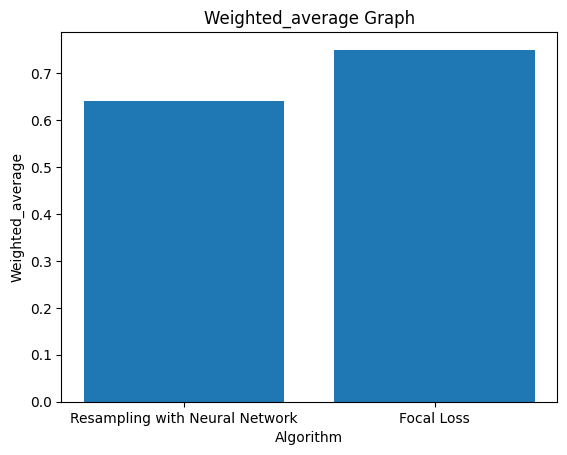

In [20]:
import matplotlib.pyplot as plt

# Sample data
Algorithm = ['Resampling with Neural Network', 'Focal Loss']
F1_score = [0.64,0.75]

# Create a bar graph
plt.bar(Algorithm, F1_score)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Weighted_average')
plt.title('Weighted_average Graph')

# Show the graph
plt.show()

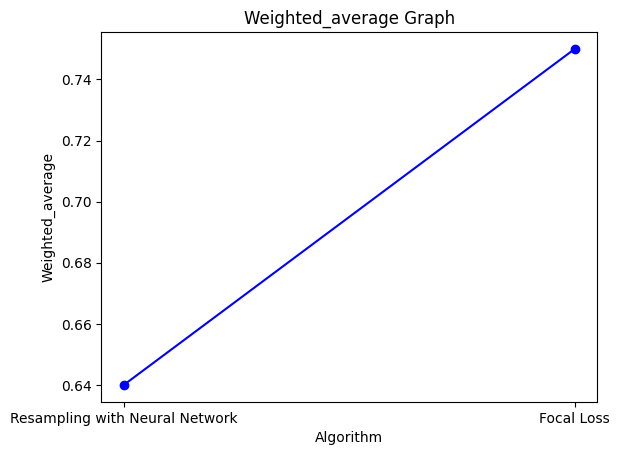

In [21]:
import matplotlib.pyplot as plt

# Sample data
Algorithm = ['Resampling with Neural Network', 'Focal Loss']
F1_score = [0.64,0.75]

# Create a bar graph
plt.plot(Algorithm, F1_score, marker='o', linestyle='-', color='b', label='Data')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Weighted_average')
plt.title('Weighted_average Graph')

# Show the graph
plt.show()